# Ensemble Methods II

Today we will examine both regression and classification problems together with the techniques of bagging and boosting.  To begin, let's take a look at a dataset dealing with diamonds.

In [ ]:
import pandas as pd

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv.zip', compression='zip', index_col=0)

In [ ]:
diamonds.info()

In [5]:
diamond = pd.get_dummies(diamonds, drop_first=True)

In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 24 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
clarity_VS1      53940 non-null uint8
clarity_VS2      53940 non-null uint8
clarity_VVS1     53940 non-null uint8
clari

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

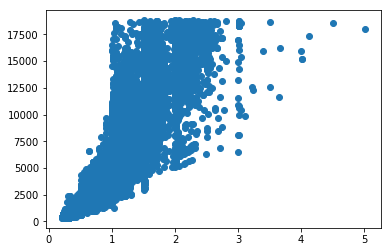

In [8]:
plt.scatter(diamonds.carat, diamonds.price)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [20]:
X = diamond.drop('price', axis = 1)
y = diamond.price
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
from sklearn.pipeline import make_pipeline

In [22]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

In [23]:
knn_pipe.fit(X_train, y_train)
knn_train_score = mean_squared_error(knn_pipe.predict(X_train), y_train)
knn_test_score = mean_squared_error(knn_pipe.predict(X_test), y_test)

In [24]:
print("KNN Train Score: ", knn_train_score, "\nTest Score: ", knn_test_score)

KNN Train Score:  455078.8631051785 
Test Score:  740827.7356292176


In [25]:
from sklearn.ensemble import BaggingRegressor

In [26]:
knn_bag = KNeighborsRegressor(n_neighbors=5)
bagging = BaggingRegressor(base_estimator=knn_bag, n_estimators=10, max_features=0.8)
bag_pipe = make_pipeline(StandardScaler(), bagging)

In [27]:
bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('baggingregressor', BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [28]:
bag_pipe_train_score = mean_squared_error(bag_pipe.predict(X_train), y_train)
bag_pipe_test_score = mean_squared_error(bag_pipe.predict(X_test), y_test)

In [29]:
print("Baggin Train: ", bag_pipe_train_score, "\nBaggin Test", bag_pipe_test_score)

Baggin Train:  448762.6596854975 
Baggin Test 755525.3642375381


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

In [32]:
forest_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [33]:
forest_train_error = mean_squared_error(forest_pipe.predict(X_train), y_train)
forest_test_error = mean_squared_error(forest_pipe.predict(X_test), y_test)

In [34]:
print("Forest Train Error: ", forest_train_error, "\nForest Test Error: ", forest_test_error)

Forest Train Error:  79523.4388590267 
Forest Test Error:  448948.7776100502


In [35]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
boost_pipe = make_pipeline(StandardScaler(),AdaBoostRegressor())

In [37]:
boost_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('adaboostregressor', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None))])

In [38]:
boost_train_error = mean_squared_error(boost_pipe.predict(X_train), y_train)
boost_test_error = mean_squared_error(boost_pipe.predict(X_test), y_test)       

In [39]:
print('Boost Train Error: ', boost_train_error, '\nBoost Test Error: ', boost_test_error)

Boost Train Error:  2056795.5887673912 
Boost Test Error:  2146239.9404245913


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=4, learning_rate=0.8)

In [42]:
gb_pipe = make_pipeline(StandardScaler(), gbrt)

In [43]:
gb_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.8, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...ors=4, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])

In [44]:
gb_train_err = mean_squared_error(gb_pipe.predict(X_train), y_train)
gb_test_err = mean_squared_error(gb_pipe.predict(X_test), y_test)

In [45]:
print("Train: ", gb_train_err, "\nTest: ", gb_test_err)

Train:  1264620.050943087 
Test:  1421244.873509665


In [46]:
errs = pd.DataFrame([boost_test_error, knn_test_score, bag_pipe_test_score, forest_test_error, gb_test_err])

In [47]:
errs.T.head()

,0,1,2,3,4
0,2.146240e+06,740827.735629,755525.364238,448948.77761,1.421245e+06


In [48]:
errs = errs.T

In [49]:
errs.columns = ['Boost', 'KNN', 'Bagging', 'Random Forest', 'GBoost']

In [50]:
errs

,Boost,KNN,Bagging,Random Forest,GBoost
0,2.146240e+06,740827.735629,755525.364238,448948.77761,1.421245e+06


In [51]:
import seaborn as sns

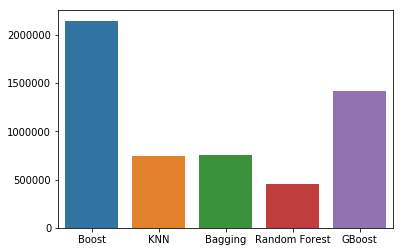

In [52]:
sns.barplot( data = errs)

### Classification Problem

In [56]:
credit = pd.read_excel('data/credit.xls', header = 1, index_col= 0)

In [57]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [58]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [60]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
y = credit['default payment next month']

In [67]:
X = credit.drop(['default payment next month'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
lr = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
8,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
9,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000


### PROBLEM

Develop Classification models as we did above for regression.  What model performs the best between **accuracy, precision**, and **recall**:

- `LogisticRegression`
- `BaggingClassifier`
- `RandomForestClassifier`
- `AdaBoostClassifier`

**BONUS**

Return to your examples and perform some grid searches.  Did this improve performance?

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

In [70]:
def class_picker(model):
    clf = model
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print(classification_report(pred, y_test))

In [ ]:
class_picker(LogisticRegression())

In [ ]:
credit